In [1]:
import scipy.io as sio
from matplotlib import pyplot as plt 
%matplotlib inline
import numpy as np 
import os 

import mne
import numpy as np
import scipy.io as sio
 

In [72]:
# coding: utf-8

def _loadftfile(path):

    filecontents = sio.whosmat(path)
    
    strucname = filecontents[0][0]

    mat = sio.loadmat(path, squeeze_me=True, struct_as_record=False)
    matstruct = mat[strucname]
    return matstruct 


def _matstruc2mne(matstruct,ch_names=None):
    
    if ch_names is None:
        ch_names=list(matstruct.label)
        
    myinfo = mne.create_info(ch_names=ch_names,sfreq=1/(matstruct.time[1] - matstruct.time[0]),ch_types='eeg')
    ev_arr = mne.EvokedArray(matstruct.individual.mean(axis=0),myinfo)
    ev_arr.set_montage(mne.channels.read_montage("EGI_256"))
    return ev_arr


def _matstruc2mne_epochs(matstruct,ch_names=None):
    
    if ch_names is None:
        ch_names=list(matstruct.label)
        
    myinfo = mne.create_info(ch_names=ch_names,sfreq=1/(matstruct.time[1] - matstruct.time[0]),ch_types='eeg')
    ev_arr = mne.EpochsArray(matstruct.individual,myinfo)
    ev_arr.set_montage(mne.channels.read_montage("EGI_256"))
    return ev_arr

In [4]:
matfile = '/home/nfarrugi/datasets/eeg4sounds/result-eeg4sounds/oddball/grav/grav_bin_dev.mat'

mat_bin_dev = _loadftfile(matfile)

matfile = '/home/nfarrugi/datasets/eeg4sounds/result-eeg4sounds/oddball/grav/grav_bin_std.mat'

mat_bin_std = _loadftfile(matfile)



matfile = '/home/nfarrugi/datasets/eeg4sounds/result-eeg4sounds/oddball/grav/grav_ste_dev.mat'

mat_ste_dev = _loadftfile(matfile)

matfile = '/home/nfarrugi/datasets/eeg4sounds/result-eeg4sounds/oddball/grav/grav_ste_std.mat'

mat_ste_std = _loadftfile(matfile)


In [70]:
ev_bin_dev = _matstruc2mne(mat_bin_dev)
ev_bin_std = _matstruc2mne(mat_bin_std)

ev_ste_dev = _matstruc2mne(mat_ste_dev)
ev_ste_std = _matstruc2mne(mat_ste_std)

mne.equalize_channels([ev_bin_dev,ev_ste_dev,ev_bin_std,ev_ste_std])

Identifying common channels ...
Dropped the following channels:
['E211', 'E248', 'E169', 'E53', 'E253', 'E227', 'E125', 'E75', 'E64', 'E245', 'E150', 'E34', 'E177', 'E35', 'E231', 'E256', 'E203', 'E160', 'E29', 'E168', 'E251', 'E192', 'E9', 'E49', 'E183', 'E238', 'E179', 'E144', 'E12', 'E138', 'E158', 'E213', 'E59', 'E201', 'E63', 'E47', 'E73']


In [79]:
epochs_bin_dev = _matstruc2mne_epochs(mat_bin_dev)
epochs_bin_std = _matstruc2mne_epochs(mat_bin_std)

epochs_ste_dev = _matstruc2mne_epochs(mat_ste_dev)
epochs_ste_std = _matstruc2mne_epochs(mat_ste_std)

mne.equalize_channels([epochs_bin_dev,epochs_bin_std,epochs_ste_dev,epochs_ste_std])

19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Identifying common channels ...
Dropped the following channels:
['E211', 'E248', 'E169', 'E53', 'E253', 'E227', 'E125', 'E75', 'E64', 'E245', 'E150', 'E34', 'E177', 'E35', 'E231', 'E256', 'E203', 'E160', 'E29', 'E168', 'E251', 'E192', 'E9', 'E49', 'E183', 'E238', 'E179', 'E144', 'E12', 'E138', 'E158', 'E213', 'E59', 'E201', 'E63', 'E47', 'E73']


In [80]:
epochs_bin_dev.get_data().shape

(19, 124, 701)

In [81]:
mat_bin_dev.individual.shape

(19, 145, 701)

In [84]:
# Extract data: transpose because the cluster test requires channels to be last
# In this case, inference is done over items. In the same manner, we could
# also conduct the test over, e.g., subjects.
X_bin = [epochs_bin_dev.get_data().transpose(0, 2, 1),
     epochs_bin_std.get_data().transpose(0, 2, 1)]

X_ste = [epochs_ste_dev.get_data().transpose(0, 2, 1),
     epochs_ste_std.get_data().transpose(0, 2, 1)]

X_dev = [epochs_bin_dev.get_data().transpose(0, 2, 1),
     epochs_ste_dev.get_data().transpose(0, 2, 1)]

X_stan = [epochs_bin_std.get_data().transpose(0, 2, 1),
     epochs_ste_std.get_data().transpose(0, 2, 1)]

In [85]:
tfce = dict(start=1.5, step=.2)

T_obs_bin,clusters_bin,clusters_pb_bin,H0_bin = mne.stats.spatio_temporal_cluster_test(X_bin,threshold=None,n_permutations=1000,out_type='mask')

Using a threshold of 21.093024
stat_fun(H1): min=0.000000 max=60.500441
Running initial clustering
Found 31 clusters
Permuting 4999 times...
[....................................... ] 99.86%  |   Computing cluster p-values
Done.


In [86]:
T_obs_ste,clusters_ste,clusters_pb_ste,H0_ste = mne.stats.spatio_temporal_cluster_test(X_ste,threshold=None,n_permutations=1000,out_type='mask')

Using a threshold of 21.093024
stat_fun(H1): min=0.000000 max=31.585274
Running initial clustering
Found 18 clusters
Permuting 4999 times...
[....................................... ] 99.86%  |   Computing cluster p-values
Done.


In [1]:
T_obs_dev,clusters_dev,clusters_pb_dev,H0_dev = mne.stats.spatio_temporal_cluster_test(X_dev,threshold=None,n_permutations=1000,out_type='mask')

NameError: name 'mne' is not defined

In [88]:
T_obs_stan,clusters_stan,clusters_pb_stan,H0_stan = mne.stats.spatio_temporal_cluster_test(X_stan,threshold=None,n_permutations=1000,out_type='mask')

Using a threshold of 21.093024
stat_fun(H1): min=0.000000 max=9.579573
Running initial clustering
Found 0 clusters
No clusters found, returning empty H0, clusters, and cluster_pv


<ipython-input-88-f50c89e4c63a>:1: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  T_obs_dev,clusters_dev,clusters_pb_dev,H0_dev = mne.stats.spatio_temporal_cluster_test(X_stan,threshold=None,n_permutations=5000,out_type='mask')


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-49-2510a0a40d4e>:4: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_joint(title="Deviants Binaural vs. Stereo")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-49-2510a0a40d4e>:4: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_joint(title="Deviants Binaural vs. Stereo")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave


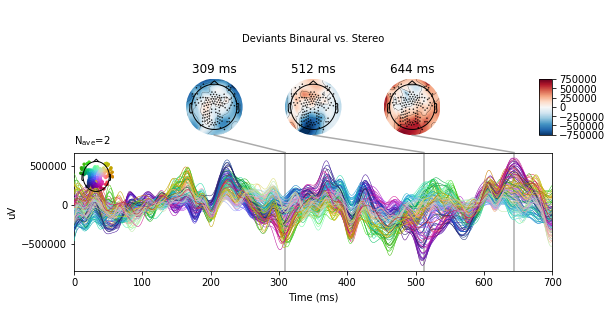

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-49-2510a0a40d4e>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


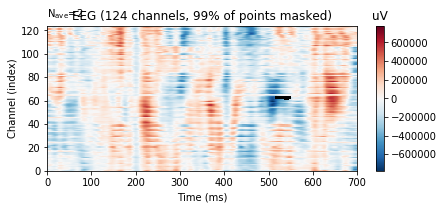

In [49]:
evoked = mne.combine_evoked([ev_bin_dev, -ev_ste_dev],
                            weights='equal')  # calculate difference wave
time_unit = dict(time_unit="ms")
evoked.plot_joint(title="Deviants Binaural vs. Stereo")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave
plt.show()

for clust,pval in zip(clusters_dev,clusters_pb_dev):
    if pval < 0.001:
        evoked.plot_image(mask=clust.T,mask_style='contour')
        plt.show()

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-40-8be4ff325bc6>:4: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_joint(title="Binaural Deviant vs. Std")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-40-8be4ff325bc6>:4: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_joint(title="Binaural Deviant vs. Std")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave


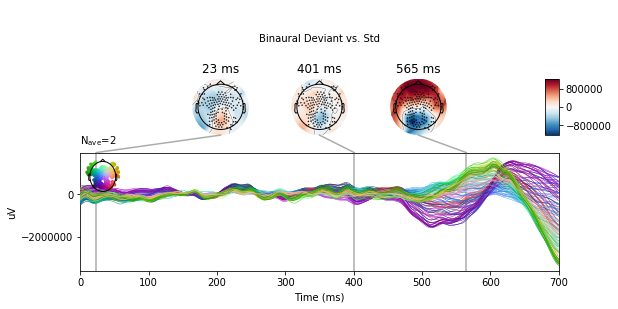

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-40-8be4ff325bc6>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


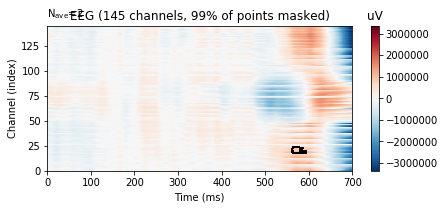

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-40-8be4ff325bc6>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


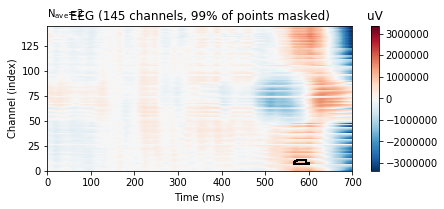

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-40-8be4ff325bc6>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


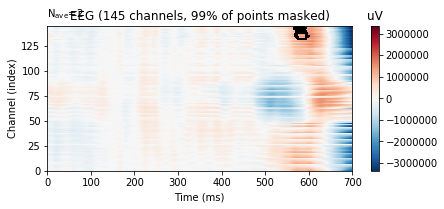

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-40-8be4ff325bc6>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


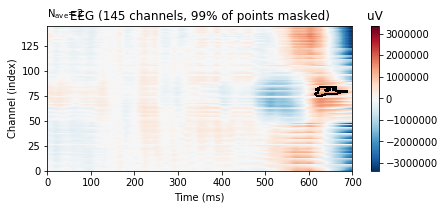

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-40-8be4ff325bc6>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


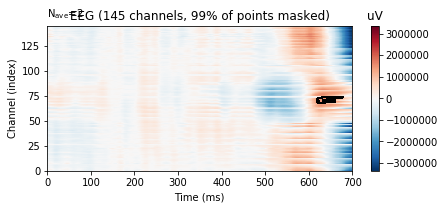

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-40-8be4ff325bc6>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


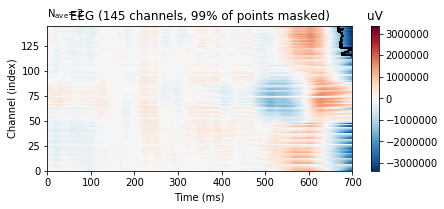

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-40-8be4ff325bc6>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


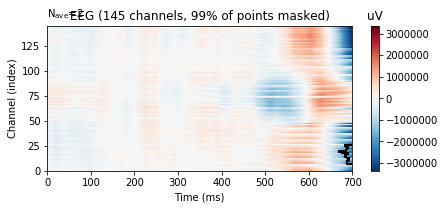

In [40]:
evoked = mne.combine_evoked([ev_bin_dev, -ev_bin_std],
                            weights='equal')  # calculate difference wave
time_unit = dict(time_unit="ms")
evoked.plot_joint(title="Binaural Deviant vs. Std")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave
plt.show()

for clust,pval in zip(clusters_bin,clusters_pb_bin):
    if pval < 0.001:
        evoked.plot_image(mask=clust.T,mask_style='contour')
        plt.show()

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-41-c488585a552b>:4: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_joint(title="Stereo Deviant vs. Std")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-41-c488585a552b>:4: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_joint(title="Stereo Deviant vs. Std")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave


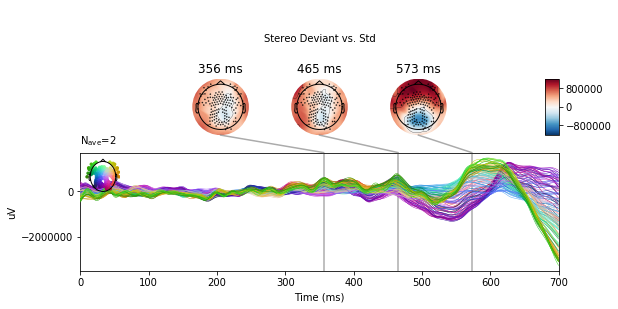

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-41-c488585a552b>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


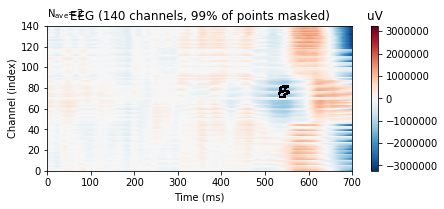

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-41-c488585a552b>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


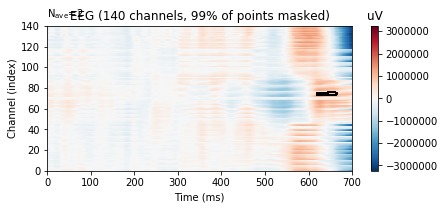

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-41-c488585a552b>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


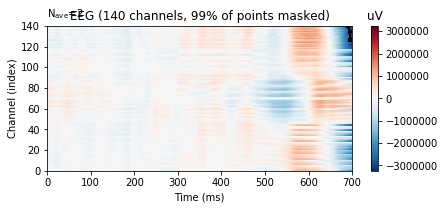

In [41]:
evoked = mne.combine_evoked([ev_ste_dev, -ev_ste_std],
                            weights='equal')  # calculate difference wave

evoked.plot_joint(title="Stereo Deviant vs. Std")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave
plt.show()

for clust,pval in zip(clusters_ste,clusters_pb_ste):
    if pval < 0.001:
        evoked.plot_image(mask=clust.T,mask_style='contour')
        plt.show()